# Satellite Data Analysis

1. use QGIS to clip rasters to AOI
2. copy clips to `../data/src/rst/
3. load each raster for viewing
4. calculate all indices for each, 
5. display with consistent stretch


In [5]:
# pip install -r ../requirements.txt

In [6]:
import os, sys
import numpy as np
import fiona
import rasterio
from rasterio import features
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib


## T_1

In [7]:
src_1 = rasterio.open('../data/aoi_1/t_1.tif', mode="r+")
rasterArray_1 = src_1.read()

In [8]:
## Explore the dataset
print(src_1.name)
print(src_1.mode)
print(src_1.closed)
print(f'band count = {src_1.count}')
print(f'dataset width = {src_1.width}')
print(f'dataset height = {src_1.height}')

## Examine Attributes
print({i: dtype for i, dtype in zip(src_1.indexes, src_1.dtypes)})
print()

## examine georeference
print(src_1.bounds)
print()
print(src_1.transform)
print()

# location of upper left corner of the dataset
print(f'location of upper left corner of the dataset {src_1.transform * (0,0)}')
print()

# location of lower right corner of the dataset
print(f'location of lower right corner of the dataset {src_1.transform * (src_1.width, src_1.height)}')
print()

# Get the CRS
print(f'The Coordinate Reference System is {src_1.crs}')
print()

print(src_1.nodatavals)
print(src_1.nodata)
print()

print(src_1.dataset_mask().shape)

../data/aoi_1/t_1.tif
r+
False
band count = 8
dataset width = 913
dataset height = 624
{1: 'uint16', 2: 'uint16', 3: 'uint16', 4: 'uint16', 5: 'uint16', 6: 'uint16', 7: 'uint16', 8: 'uint16'}

BoundingBox(left=513732.0, bottom=3574185.0, right=516471.0, top=3576057.0)

| 3.00, 0.00, 513732.00|
| 0.00,-3.00, 3576057.00|
| 0.00, 0.00, 1.00|

location of upper left corner of the dataset (513732.0, 3576057.0)

location of lower right corner of the dataset (516471.0, 3574185.0)

The Coordinate Reference System is EPSG:32614

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
0.0

(624, 913)


In [9]:
#The commented out rows are causing this error -> TypeError: Invalid shape (624, 913, 8) for image data
# I think this is because it has 8 bands and it needs to be 2 or 3
# Possibly relevant stack overflow post -- https://stackoverflow.com/questions/36431496/typeerror-invalid-dimensions-for-image-data-when-plotting-array-with-imshow

# show(rasterArray_1, transform=src_1.transform)  
print(rasterArray_1)
# msk_1 = src_1.read_masks()
# show(msk_1)

[[[ 635  588  598 ...  591  614  631]
  [ 692  605  599 ...  613  626  627]
  [ 672  636  616 ...  646  646  645]
  ...
  [ 539  542  517 ...  705  752  739]
  [ 491  456  439 ...  713  699  688]
  [ 484  482  485 ...  706  717  728]]

 [[ 770  724  723 ...  760  753  753]
  [ 732  699  695 ...  753  748  751]
  [ 715  705  692 ...  732  756  753]
  ...
  [ 564  569  545 ...  940  923  932]
  [ 567  587  546 ...  934  932  924]
  [ 574  591  546 ...  916  935  944]]

 [[ 919  938  934 ...  874  842  847]
  [ 905  903  888 ...  872  848  859]
  [ 883  857  852 ...  875  865  868]
  ...
  [ 677  623  632 ... 1125 1116 1130]
  [ 670  668  620 ... 1144 1126 1084]
  [ 668  665  628 ... 1135 1137 1121]]

 ...

 [[1587 1542 1500 ... 1460 1447 1452]
  [1551 1475 1423 ... 1467 1442 1465]
  [1530 1452 1377 ... 1460 1390 1462]
  ...
  [ 987  987  980 ... 1837 1843 1780]
  [1021  994  971 ... 1823 1814 1795]
  [1031  982  959 ... 1844 1793 1740]]

 [[1887 1776 1741 ... 1800 1768 1763]
  [1839 1709

In [10]:
# Naming the bands

coastal_blue  = src_1.read(1)
blue = src_1.read(2)
green_i   = src_1.read(3)
green = src_1.read(4)
yellow = src_1.read(5)
red = src_1.read(6)
rededge = src_1.read(7)
nir = src_1.read(8)


# Not being used except for the two cells below this


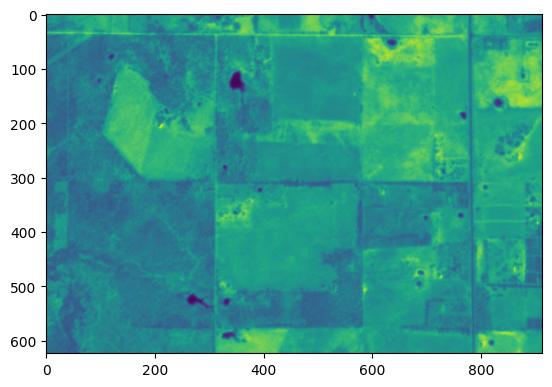

In [11]:
#display one band:
plt.imshow(nir)

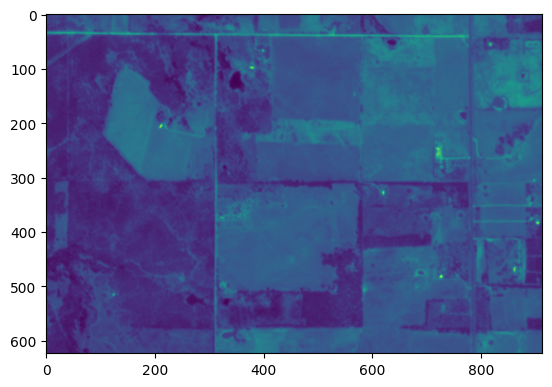

In [12]:
matplotlib.pyplot.imshow(red + green + blue)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


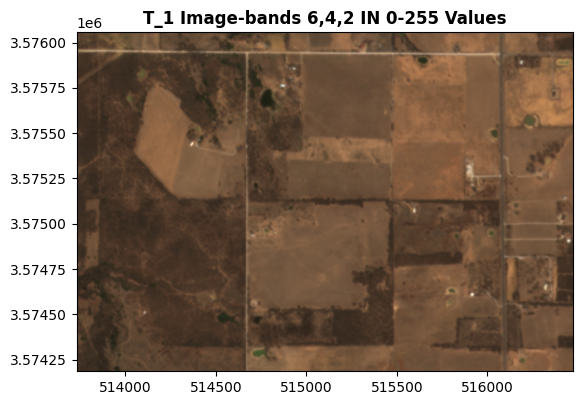

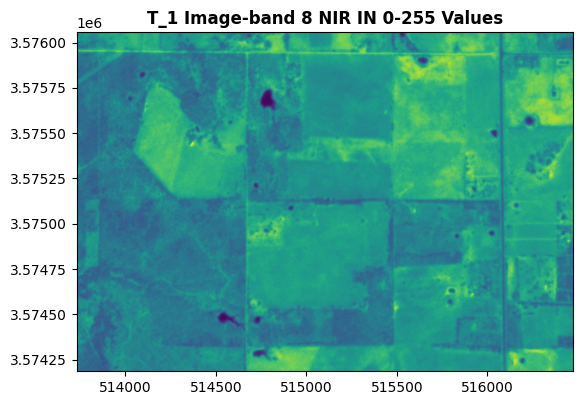

<AxesSubplot: title={'center': 'T_1 Image-band 8 NIR IN 0-255 Values'}>

In [13]:
show(src_1.read([6, 4, 2])/4000, transform=src_1.transform,
     title='T_1 Image-bands 6,4,2 IN 0-255 Values')
show(src_1.read([8])/4000, transform=src_1.transform,
     title='T_1 Image-band 8 NIR IN 0-255 Values')


## T_2

In [14]:
src_2 = rasterio.open('../data/aoi_1/t_2.tif', mode="r+")
rasterArray_2 = src_2.read()

In [15]:
## Explore the dataset
print(src_2.name)
print(src_2.mode)
print(src_2.closed)
print(f'band count = {src_2.count}')
print(f'dataset width = {src_2.width}')
print(f'dataset height = {src_2.height}')

## Examine Attributes
print({i: dtype for i, dtype in zip(src_2.indexes, src_2.dtypes)})
print()

## examine georeference
print(src_2.bounds)
print()
print(src_2.transform)
print()

# location of upper left corner of the dataset
print(f'location of upper left corner of the dataset {src_2.transform * (0,0)}')
print()

# location of lower right corner of the dataset
print(f'location of lower right corner of the dataset {src_2.transform * (src_2.width, src_2.height)}')
print()

# Get the CRS
print(f'The Coordinate Reference System is {src_2.crs}')
print()

print(src_2.nodatavals)
print(src_2.nodata)
print()

print(src_2.dataset_mask().shape)

../data/aoi_1/t_2.tif
r+
False
band count = 8
dataset width = 913
dataset height = 624
{1: 'uint16', 2: 'uint16', 3: 'uint16', 4: 'uint16', 5: 'uint16', 6: 'uint16', 7: 'uint16', 8: 'uint16'}

BoundingBox(left=513732.0, bottom=3574185.0, right=516471.0, top=3576057.0)

| 3.00, 0.00, 513732.00|
| 0.00,-3.00, 3576057.00|
| 0.00, 0.00, 1.00|

location of upper left corner of the dataset (513732.0, 3576057.0)

location of lower right corner of the dataset (516471.0, 3574185.0)

The Coordinate Reference System is EPSG:32614

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
0.0

(624, 913)


In [16]:
# show(rasterArray_2, transform=src_2.transform)
print(rasterArray_2)
# msk_2 = src_2.read_masks()
# show(msk_2)

[[[ 423  445  455 ...  340  358  362]
  [ 430  444  449 ...  358  403  367]
  [ 422  440  466 ...  416  482  421]
  ...
  [ 312  311  297 ...  170  172  165]
  [ 311  305  304 ...  185  168  176]
  [ 329  314  311 ...  142  124  127]]

 [[ 612  643  657 ...  517  528  531]
  [ 607  624  644 ...  521  524  537]
  [ 606  584  601 ...  558  517  541]
  ...
  [ 446  445  409 ...  257  248  270]
  [ 432  419  402 ...  272  273  284]
  [ 430  398  383 ...  260  261  269]]

 [[ 769  770  775 ...  567  572  558]
  [ 738  750  764 ...  567  577  570]
  [ 713  709  724 ...  584  611  596]
  ...
  [ 505  492  477 ...  311  304  295]
  [ 484  473  468 ...  303  289  282]
  [ 467  463  462 ...  315  295  289]]

 ...

 [[1351 1359 1379 ...  934  960  986]
  [1290 1302 1334 ...  930  955  983]
  [1257 1265 1302 ...  945  955  994]
  ...
  [ 871  845  805 ...  520  524  503]
  [ 866  852  817 ...  507  534  558]
  [ 867  863  823 ...  564  556  547]]

 [[1624 1679 1717 ... 1113 1134 1149]
  [1568 1616

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


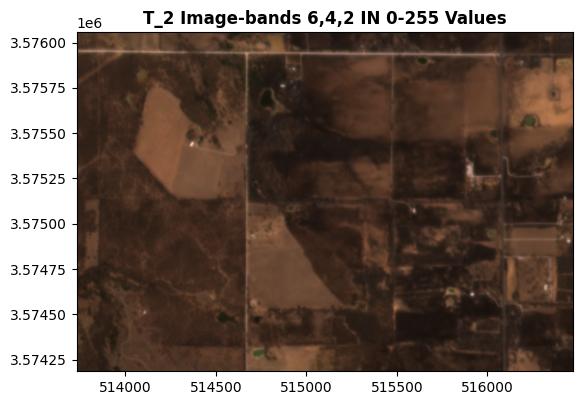

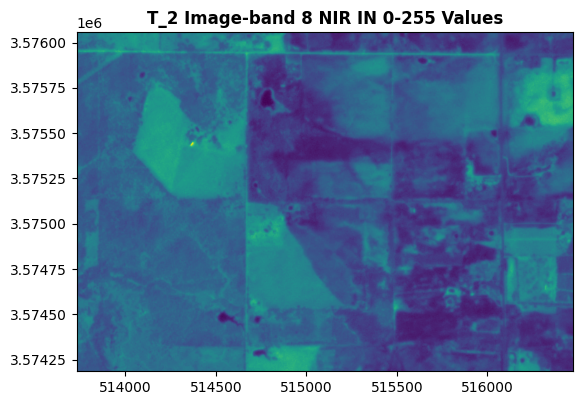

<AxesSubplot: title={'center': 'T_2 Image-band 8 NIR IN 0-255 Values'}>

In [17]:
show(src_2.read([6,4,2])/4000,transform=src_2.transform,title='T_2 Image-bands 6,4,2 IN 0-255 Values')
show(src_2.read([8])/4000,transform=src_2.transform,title='T_2 Image-band 8 NIR IN 0-255 Values')

## T_3

In [18]:
src_3 = rasterio.open('../data/aoi_1/t_3.tif', mode="r+")
rasterArray_3 = src_3.read()

In [19]:
## Explore the dataset
print(src_3.name)
print(src_3.mode)
print(src_3.closed)
print(f'band count = {src_3.count}')
print(f'dataset width = {src_3.width}')
print(f'dataset height = {src_3.height}')

## Examine Attributes
print({i: dtype for i, dtype in zip(src_3.indexes, src_3.dtypes)})
print()

## examine georeference
print(src_3.bounds)
print()
print(src_3.transform)
print()

# location of upper left corner of the dataset
print(f'location of upper left corner of the dataset {src_3.transform * (0,0)}')
print()

# location of lower right corner of the dataset
print(f'location of lower right corner of the dataset {src_3.transform * (src_3.width, src_1.height)}')
print()

# Get the CRS
print(f'The Coordinate Reference System is {src_3.crs}')
print()

print(src_3.nodatavals)
print(src_3.nodata)
print()

print(src_3.dataset_mask().shape)

../data/aoi_1/t_3.tif
r+
False
band count = 8
dataset width = 913
dataset height = 624
{1: 'uint16', 2: 'uint16', 3: 'uint16', 4: 'uint16', 5: 'uint16', 6: 'uint16', 7: 'uint16', 8: 'uint16'}

BoundingBox(left=513732.0, bottom=3574185.0, right=516471.0, top=3576057.0)

| 3.00, 0.00, 513732.00|
| 0.00,-3.00, 3576057.00|
| 0.00, 0.00, 1.00|

location of upper left corner of the dataset (513732.0, 3576057.0)

location of lower right corner of the dataset (516471.0, 3574185.0)

The Coordinate Reference System is EPSG:32614

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
0.0

(624, 913)


In [20]:
# show(rasterArray_3, transform=src_3.transform)
print(rasterArray_3)
# msk_3 = src_3.read_masks()
# show(msk_3)

[[[ 441  425  383 ...  478  488  462]
  [ 407  359  343 ...  511  509  474]
  [ 393  415  369 ...  497  496  496]
  ...
  [ 238  260  272 ...  418  539  545]
  [ 235  243  254 ...  432  496  433]
  [ 218  212  219 ...  470  440  456]]

 [[ 544  543  556 ...  584  602  609]
  [ 539  506  513 ...  573  601  627]
  [ 516  481  491 ...  594  612  631]
  ...
  [ 284  298  284 ...  640  655  647]
  [ 298  284  275 ...  648  655  647]
  [ 291  263  261 ...  649  653  662]]

 [[ 775  796  815 ...  803  767  782]
  [ 757  787  798 ...  765  752  780]
  [ 768  774  771 ...  777  777  809]
  ...
  [ 535  519  502 ...  976  976  972]
  [ 501  506  515 ...  981  973  962]
  [ 494  486  497 ...  982  971  954]]

 ...

 [[1097 1129 1185 ... 1134 1154 1192]
  [1047 1115 1160 ... 1133 1168 1187]
  [1049 1048 1079 ... 1168 1180 1187]
  ...
  [ 472  490  461 ... 1191 1189 1143]
  [ 474  460  436 ... 1197 1190 1182]
  [ 471  438  430 ... 1191 1182 1165]]

 [[1539 1539 1601 ... 1468 1506 1531]
  [1500 1540

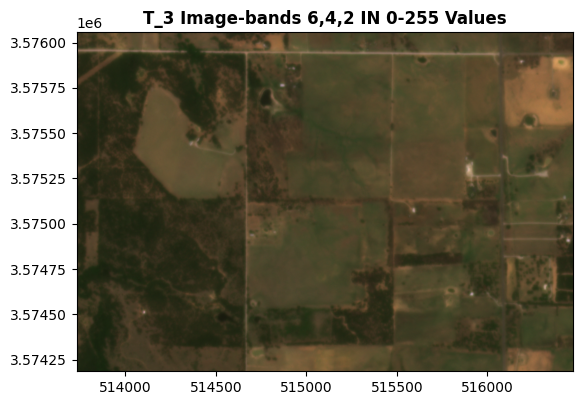

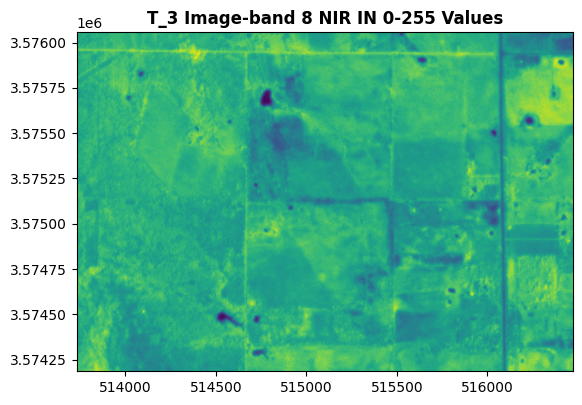

<AxesSubplot: title={'center': 'T_3 Image-band 8 NIR IN 0-255 Values'}>

In [21]:
show(src_3.read([6,4,2])/4000,transform=src_3.transform,title='T_3 Image-bands 6,4,2 IN 0-255 Values')
show(src_3.read([8])/4000,transform=src_3.transform,title='T_3 Image-band 8 NIR IN 0-255 Values')